In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


Yuqoridagi jadvalda MohirDev MChJ tomonidan turli OAV larda (`TV`, `Radio`, `Newspaper`) berilgan reklamalar soni va mos keluvchi savdolar (`Sales`) berilgan.

Sizning vazifangiz:
1. Aynan qaysi turdagi OAVda reklama berish savdo o'sishiga ta'sir qiladi aniqlash
2. Topilgan bog'liqlik asosida Simple Linear Regression algorithmi yordamida bashorat modelini qurish.

In [11]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
df.corr()['Sales']

,Sales
TV,0.901208
Radio,0.349631
Newspaper,0.157960
Sales,1.000000


In [14]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


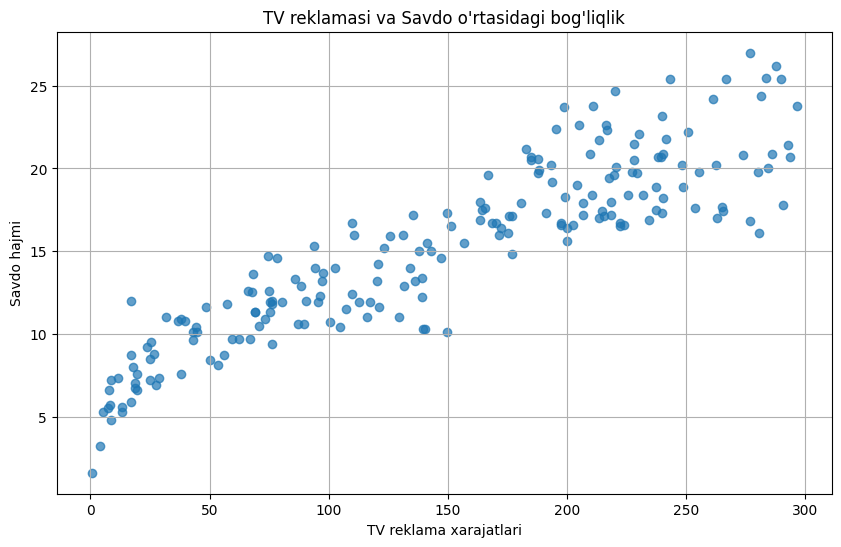

In [15]:
# TV reklamasi va savdo o'rtasidagi bog'liqlik
plt.figure(figsize=(10, 6))
plt.scatter(df['TV'], df['Sales'], alpha=0.7)
plt.title('TV reklamasi va Savdo o\'rtasidagi bog\'liqlik')
plt.xlabel('TV reklama xarajatlari')
plt.ylabel('Savdo hajmi')
plt.grid()
plt.show()

In [28]:
X = df[['TV']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f"Model koeffitsiyenti (b1): {model.coef_[0]}")
print(f"Model kesmasi (b0): {model.intercept_}")

Model koeffitsiyenti (b1): 0.05513263076693964
Model kesmasi (b0): 7.044916461655207


In [30]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"O'rtacha kvadratik xato (MSE): {mse}")
print(f"O'rtacha kvadratik ildiz xato (RMSE): {rmse}")
print(f"Determinatsiya koeffitsiyenti (R^2): {r2}")

O'rtacha kvadratik xato (MSE): 6.302018984115436
O'rtacha kvadratik ildiz xato (RMSE): 2.5103822386472214
Determinatsiya koeffitsiyenti (R^2): 0.8071768727953934


In [31]:
y_pred

array([16.04807507, 17.81783251, 23.19326401,  7.68996824, 19.19063502,
       11.18537703, 18.99767081,  9.801548  , 19.30641354, 16.69864011,
        8.78159433, 10.14337031, 19.97351838,  7.34263267, 14.73591845,
       16.42849022,  7.44738467, 17.9391243 , 11.19640356, 20.13340301])

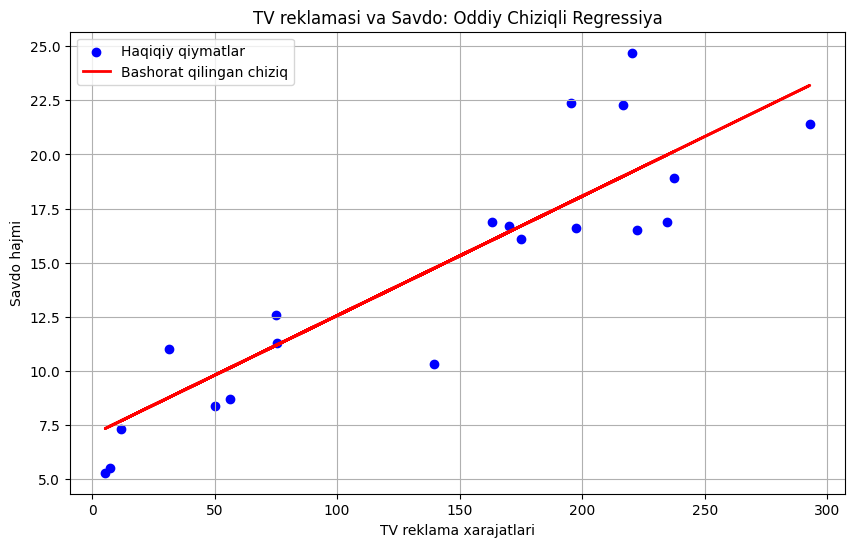

In [33]:
# Chiziqli regressiya chizig'ini ko'rsatamiz
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Haqiqiy qiymatlar')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Bashorat qilingan chiziq')
plt.title('TV reklamasi va Savdo: Oddiy Chiziqli Regressiya')
plt.xlabel('TV reklama xarajatlari')
plt.ylabel('Savdo hajmi')
plt.legend()
plt.grid()
plt.show()

In [34]:
new_tv_ad = [[150]]
predicted_sales = model.predict(new_tv_ad)
print(f"150 ming so'mlik TV reklamasi uchun bashorat qilingan savdo: {predicted_sales[0]}")

150 ming so'mlik TV reklamasi uchun bashorat qilingan savdo: 15.314811076696152


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
